<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


<p style=»text-align: justify;»>
El Departamento de Analítica No estructurada busca profesionales con fuertes capacidades técnicas y sobretodo una fuerte capacidad analítica. Por consiguiente esta prueba intenta poner a prueba la forma en la que plantea y soluciona problmeas. Es importante que presente el código que usa para resolver el problema con el único motivo de medir sus capacidades.

Se recomienda que sea ordenado en su código y siga los lineamientos establecidos, aún así la prueba tiene un grado de flexibilidad. Se evaluará el orden y la creatividad a la hora de presentar la información. 
</p>


**Nota** <br>
Tenga en cuneta que éste ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habiliadades para el cargo


#### **Objetivo**
El objetivo de esta prueba es lograr un filtro que discrimine automáticamente un tipo de documento sin información relevante: páginas en blanco. Se busca que este filtro reciba como entrada una carpeta con imágenes de documentos diversos y produzca como salida dos carpetas, una con imágenes de páginas en blanco y otra con imágenes de páginas con contenido.

Páginas con solo el membrete del documento se consideran páginas en blanco, así como las que, al momento de ser escaneadas, alcanzan a reflejar contenido ininteligible del reverso de la página.

## Clasificación de Imágenes

### 1.Importe las imágenes
En la carpeta adjunta se encontrará con documentos tanto en blanco como con contenido. Su objetivo es generar un modelo que clasifique los elementos en "Con Contenido" y "Sin Contenido". Para eso puede utilizar reglas o modelos especificos.

In [222]:
# Import TF 2.x
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [223]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

TF version: 2.9.1
Hub version: 0.12.0


In [224]:
#Importando librerías
import pandas as pd
import numpy as np
import seaborn as sns
import os
from IPython.display import display, Image
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage import io
from sklearn.model_selection import train_test_split
import datetime

In [225]:
path  = "C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Prueba_conocimientos_davivienda/Ejercicio_1_Imagenes/Datasets/"
dataset = {"image_path":[],"where":[]}
for where in os.listdir(path):
      for image in glob.glob(path+where+"/"+"*.png"):
          dataset["image_path"].append(image)
          dataset["where"].append(where)
dataset = pd.DataFrame(dataset)

In [226]:
dataset

,image_path,where
0,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Blanco
1,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Blanco
2,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Blanco
3,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Blanco
4,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Blanco
...,...,...
242,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Documentos
243,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Documentos
244,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Documentos
245,C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...,Documentos


In [227]:
dataset.replace({'Documentos':'Con contenido','Blanco':'Sin Contenido'},inplace=True)

In [228]:
filenames = dataset['image_path']
filenames

0      C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
1      C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
2      C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
3      C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
4      C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
                             ...                        
242    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
243    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
244    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
245    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
246    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
Name: image_path, Length: 247, dtype: object

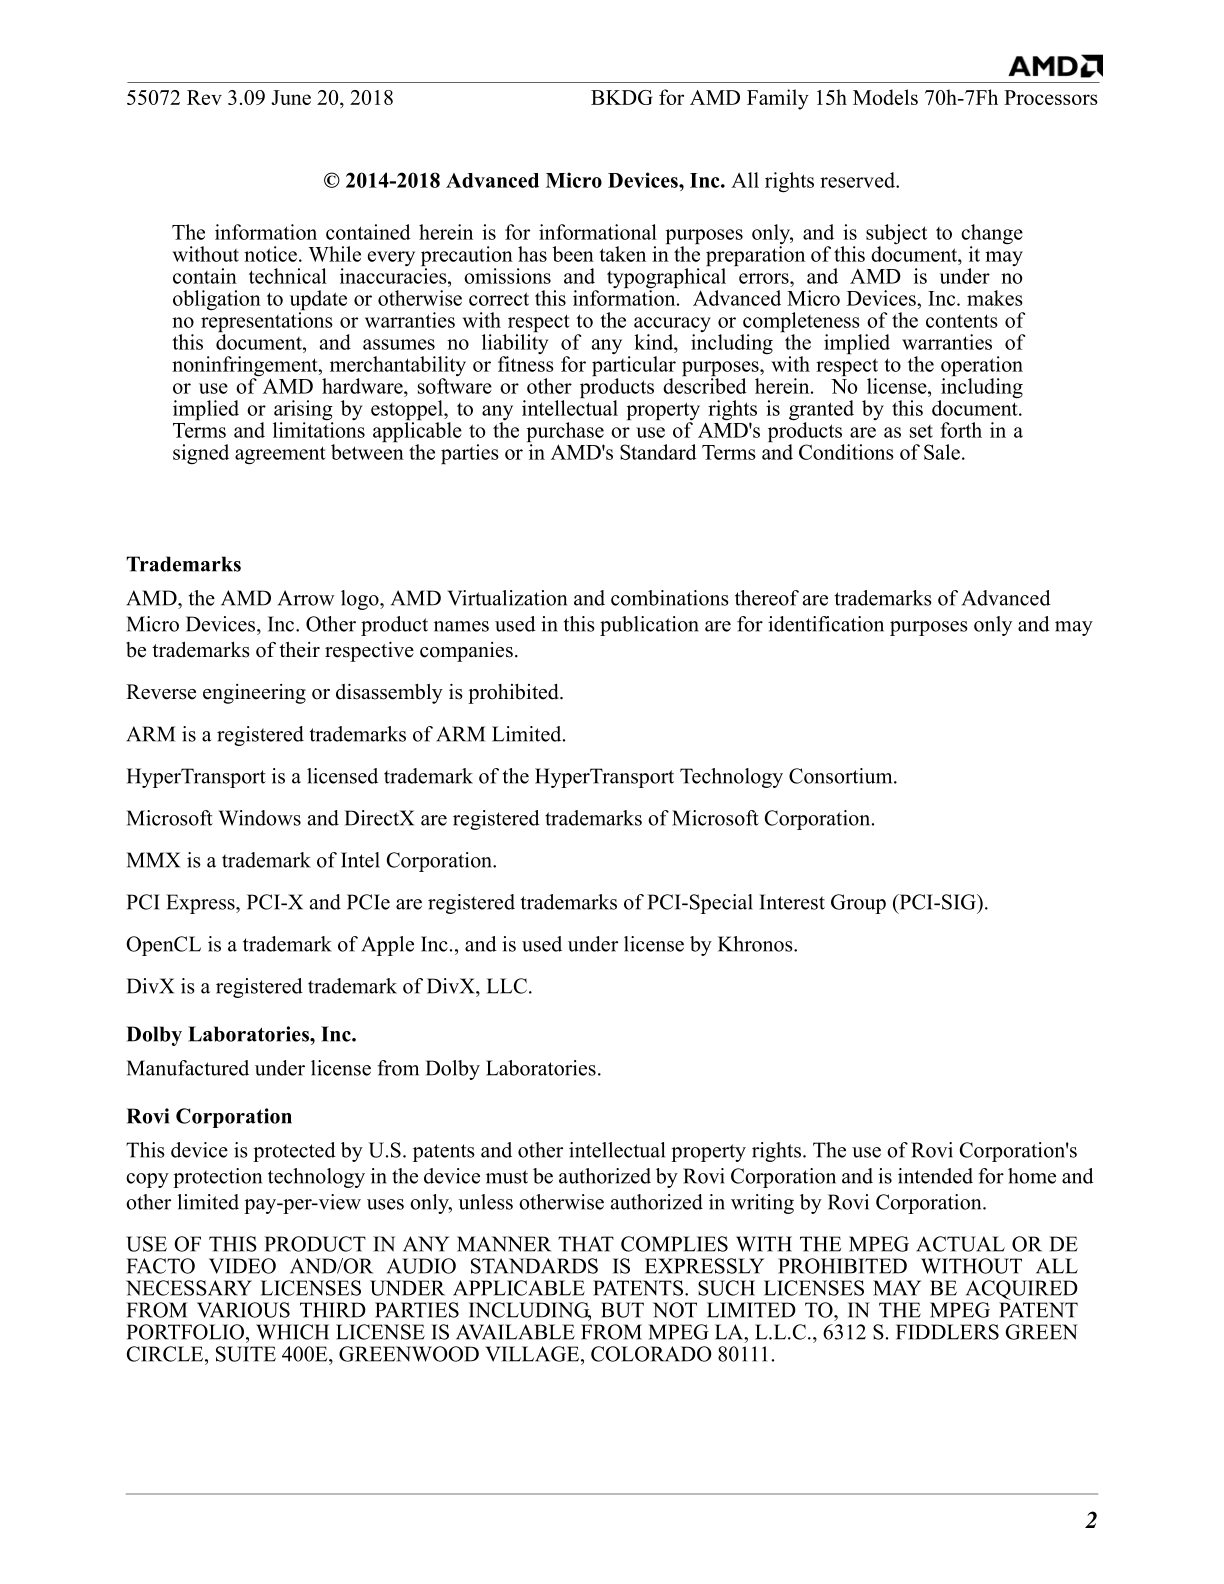

In [229]:
# Comprobar una imagen directamente desde una ruta de archivo
Image(filenames[156])

In [230]:
dataset.value_counts("where")

where
Sin Contenido    147
Con contenido    100
dtype: int64

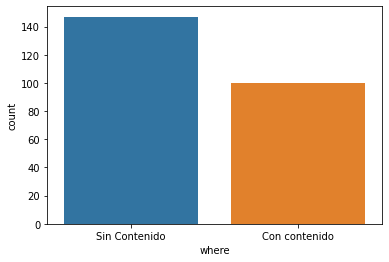

In [231]:
#Verificación de balanceamiento de datos
sns.countplot(dataset["where"])
plt.show()

### 2. Estructure la información
Debido a que las imagenes son archivos separados lo primero que debe hacer es importarlas (recuerde que una imagen es esencialmente un arreglo de vectores), puede esturcturarlas a su gusto y marcar de ser necesario aquellas que va usar como test de pruebas. 

In [232]:
labels = dataset["where"].to_numpy() # convert labels column to NumPy array
labels

array(['Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', 'Sin Contenido', 'Sin Contenido', 'Sin Contenido',
       'Sin Contenido', '

In [233]:
# Ver si el número de etiquetas coincide con el número de nombres de archivo
if len(labels) == len(dataset['image_path']):
  print("El número de etiquetas coincide con el número de nombres de archivo!")
else:
  print("El número de etiquetas no coincide con el número de nombres de archivo, verifique los directorios de datos.")

Number of labels matches number of filenames!


In [234]:
# Encuentra los valores de etiqueta únicos
unique_breeds = np.unique(labels)
len(unique_breeds)

2

In [235]:
# Ejemplo: convertir una etiqueta en una matriz de valores booleanos
print(labels[0])
labels[0] == unique_breeds # usar el operador de comparación para crear una matriz booleana

Sin Contenido


array([False,  True])

In [236]:
# Convierte cada etiqueta en una matriz booleana
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False,  True]), array([False,  True])]

In [237]:
# Ejemplo: convertir una matriz booleana en números enteros
print(labels[0])# etiqueta original
print(np.where(unique_breeds == labels[0])[0][0]) # índice donde aparece la etiqueta
print(boolean_labels[0].argmax()) # índice donde aparece la etiqueta en la matriz booleana
print(boolean_labels[0].astype(int)) # habrá un 1 donde aparece la etiqueta de muestra

Sin Contenido
1
1
[0 1]


In [238]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [239]:
# Establecer el número de imágenes que se usarán para experimentar
NUM_IMAGES = len(X) #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

247

In [240]:
# Importar train_test_split desde Scikit-Learn
from sklearn.model_selection import train_test_split

# Dividirlos en entrenamiento y validación usando NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(197, 197, 50, 50)

In [241]:
# Verifique los datos de entrenamiento (rutas y etiquetas de archivos de imagen)
X_train[:5], y_train[:2]

(154    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
 211    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
 118    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
 195    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
 240    C:/Users/ARBEY/Documents/DAVIVIENDA prueba/Pru...
 Name: image_path, dtype: object,
 [array([ True, False]), array([ True, False])])

In [242]:
#  Convertir imagen a NumPy array
image = imread(filenames[42]) # leer en una imagen
image.shape

(2800, 1702, 3)

In [243]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 1702, 3), dtype=float32, numpy=
array([[[0.7137255 , 0.72156864, 0.6784314 ],
        [0.7137255 , 0.72156864, 0.6784314 ],
        [0.7137255 , 0.72156864, 0.6784314 ],
        ...,
        [0.7058824 , 0.7176471 , 0.7019608 ],
        [0.70980394, 0.7176471 , 0.69803923],
        [0.7137255 , 0.7176471 , 0.69803923]],

       [[0.7137255 , 0.72156864, 0.6784314 ],
        [0.7137255 , 0.72156864, 0.6784314 ],
        [0.7137255 , 0.72156864, 0.6784314 ],
        ...,
        [0.69411767, 0.7137255 , 0.69411767],
        [0.7019608 , 0.72156864, 0.69803923],
        [0.7176471 , 0.7254902 , 0.7058824 ]]], dtype=float32)>

### 3. Describa su Estrategia de Análisis
<p>Tiene libertad en la metodología para la clasificación. Aún así debe describir brevemente como realizará el análisis. Por ejemplo, si usará un modelo en donde requiera clasificar una cantidad pequeña de la data mencionelo o si planea condicionar la clasifiaciónes a reglas indique que reglas usará. Además si usa herramientas externas describalas y explique. </p>


In [244]:
# Definir el tamaño de la imagen
IMG_SIZE = 224 # número total de documentos

def process_image(image_path):
  """
  Toma una ruta de archivo de imagen y la convierte en un Tensor.
  """
  # Leer en archivo de imagen
  image = tf.io.read_file(image_path)
  # Convierta la imagen jpeg en un tensor numérico con 3 canales de color (rojo, verde, azul)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convierta los valores del canal de color de 0-225 valores a 0-1 valores
  image = tf.image.convert_image_dtype(image, tf.float32)
 # Cambiar el tamaño de la imagen a nuestro tamaño deseado (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [245]:
# Crear una función simple para devolver una tupla (imagen, etiqueta)
def get_image_label(image_path, label):
  """
Toma un nombre de ruta de archivo de imagen y la etiqueta asociada, 
procesa la imagen y devuelve una tupla de (imagen, etiqueta).
  """
  image = process_image(image_path)
  return image, label

In [246]:
# Defina el tamaño del lote, 32 es un buen valor predeterminado
BATCH_SIZE = 32

# Crear una función para convertir datos en lotes
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
Crea lotes de datos a partir de pares de imágenes (x) y etiquetas (y). Mezcla los datos si son datos de entrenamiento,
pero no los mezcla si son datos de validación.
También acepta datos de prueba como entrada (sin etiquetas)
  """
 # Si los datos son un conjunto de datos de prueba, probablemente no tengamos etiquetas
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # Si los datos son un conjunto de datos válido, no necesitamos mezclarlos
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # Si los datos son un conjunto de datos de entrenamiento, los barajamos
    print("Creating training data batches...")
 # Convierta rutas de archivos y etiquetas en tensores
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
   # La combinación aleatoria de nombres de rutas y 
   # etiquetas antes de mapear la función del procesador de imágenes es más rápida que la combinación aleatoria de imágenes
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (esto también convierte la ruta de la imagen en una imagen preprocesada)
    data = data.map(get_image_label)

    # Convertir los datos en lotes
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [247]:
# Crear lotes de datos de entrenamiento y validación
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [248]:
# Consulte los diferentes atributos de nuestros lotes de datos
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

In [249]:
# Crear una función para ver imágenes en un lote de datos
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Configurar la figura
  plt.figure(figsize=(10, 10))
  #Bucle a través de 25 (para mostrar 25 imágenes)
  for i in range(25):
    # Crear subparcelas (5 filas, 5 columnas)
    ax = plt.subplot(5, 5, i+1)
    # Mostrar una imagen
    plt.imshow(images[i])
    # Agregue la etiqueta de la imagen como título
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

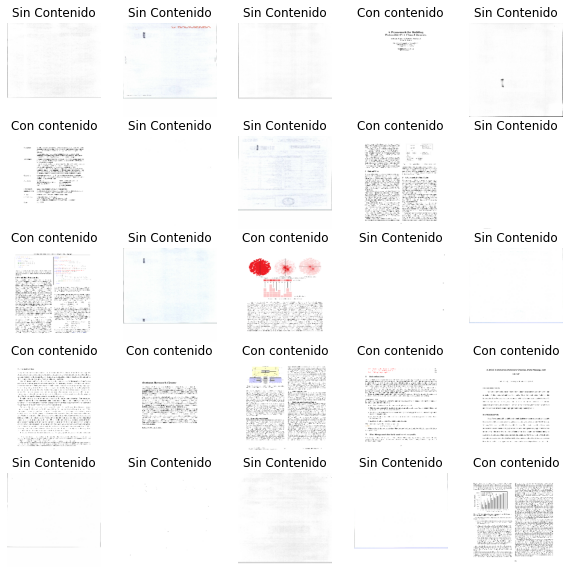

In [250]:
# Visualice imágenes de entrenamiento del lote de datos de entrenamiento
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

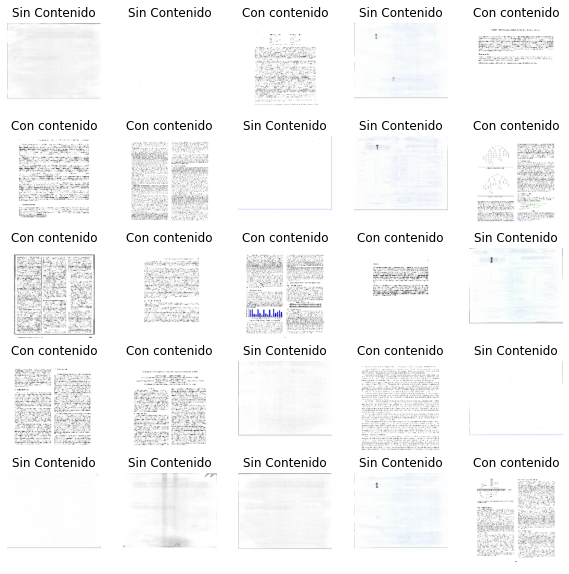

In [251]:
# Visualizar imágenes de validación del lote de datos de validación
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [252]:
# Configurar la forma de entrada al modelo
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [253]:
# Crear una función que construya un modelo de Keras
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Nuestro modelo quiere reducir esto (cuán equivocadas son sus conjeturas)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Deja que el modelo sepa qué tipo de entradas recibirá
  
  return model

In [254]:
# Crea un modelo y verifica sus detalles
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense_20 (Dense)            (None, 2)                 2004      
                                                                 
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


In [255]:
# Cargue la extensión del cuaderno TensorBoard
%load_ext tensorboard

In [256]:
import datetime

# Crea una función para construir una devolución de llamada de TensorBoard
def create_tensorboard_callback():
  # Crear un directorio de registro para almacenar registros de TensorBoard
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Hacer que los registros sean rastreados cada vez que ejecutamos un experimento
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [257]:
# Crear una parada temprana (una vez que nuestro modelo deja de mejorar, dejar de entrenar)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [258]:
# ¿Cuántas rondas debemos hacer que el modelo revise los datos?
NUM_EPOCHS = 10 #@param {type:"slider", min:10, max:100, step:10}

In [260]:
# Construir una función para entrenar y devolver un modelo entrenado
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Cree una nueva sesión de TensorBoard cada vez que entrenemos un modelo
  tensorboard = create_tensorboard_callback()

  # Ajuste el modelo a los datos pasándole las devoluciones de llamada que creamos
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # verificar las métricas de validación cada época
            callbacks=[tensorboard, early_stopping])
  
  return model

In [261]:
# Ajustar el modelo a los datos
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
7/7 [==============================] - 20s 2s/step - loss: 0.6872 - accuracy: 0.6802 - val_loss: 0.2985 - val_accuracy: 0.8200
Epoch 2/10
7/7 [==============================] - 13s 2s/step - loss: 0.1455 - accuracy: 0.9543 - val_loss: 0.0830 - val_accuracy: 0.9600
Epoch 3/10
7/7 [==============================] - 15s 2s/step - loss: 0.0382 - accuracy: 0.9848 - val_loss: 0.0441 - val_accuracy: 0.9800
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 0.0232 - accuracy: 0.9848 - val_loss: 0.0375 - val_accuracy: 0.9800
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.0166 - accuracy: 0.9898 - val_loss: 0.0262 - val_accuracy: 0.9800
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9800


### 4. Interpretación de Reusultados

In [262]:
%tensorboard --logdir drive/My\ Drive/Data/logs

Reusing TensorBoard on port 6006 (pid 2456), started 14:17:33 ago. (Use '!kill 2456' to kill it.)

In [263]:
# Hacer predicciones sobre los datos de validación (no utilizados para entrenar)
predictions = model.predict(val_data, verbose=1) # verbose nos muestra cuánto tiempo queda
predictions

2/2 [==============================] - 3s 595ms/step


array([[4.9234950e-06, 9.9999511e-01],
       [7.4060988e-03, 9.9259394e-01],
       [9.9905461e-01, 9.4544707e-04],
       [1.6943894e-05, 9.9998307e-01],
       [9.9410194e-01, 5.8980850e-03],
       [9.9993849e-01, 6.1474304e-05],
       [9.9720287e-01, 2.7972006e-03],
       [6.7772195e-03, 9.9322283e-01],
       [1.9991230e-03, 9.9800092e-01],
       [9.9982762e-01, 1.7229024e-04],
       [9.9140304e-01, 8.5970005e-03],
       [9.9810898e-01, 1.8909627e-03],
       [9.9913710e-01, 8.6291198e-04],
       [9.8894823e-01, 1.1051754e-02],
       [5.1903850e-01, 4.8096144e-01],
       [9.9926490e-01, 7.3512190e-04],
       [9.9932206e-01, 6.7796721e-04],
       [2.6947164e-06, 9.9999726e-01],
       [9.9896193e-01, 1.0380216e-03],
       [3.5800543e-03, 9.9641991e-01],
       [2.7289235e-03, 9.9727100e-01],
       [4.1212468e-07, 9.9999964e-01],
       [5.9538525e-05, 9.9994051e-01],
       [1.1083249e-05, 9.9998891e-01],
       [9.9940908e-01, 5.9089175e-04],
       [9.9957663e-01, 4.

In [264]:
# Primera predicción
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # el valor máximo de probabilidad predicho por el modelo
print(f"Sum: {np.sum(predictions[0])}") # porque usamos la activación softmax en nuestro modelo, esto estará cerca de 1
print(f"Max index: {np.argmax(predictions[0])}") # el índice de donde ocurre el valor máximo en las predicciones[0]
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # la etiqueta predicha

[4.923495e-06 9.999951e-01]
Max value (probability of prediction): 0.9999951124191284
Sum: 1.0
Max index: 1
Predicted label: Sin Contenido


In [265]:
# Convierta las probabilidades de predicción en su etiqueta respectiva (más fácil de entender)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Obtenga una etiqueta predicha basada en una matriz de probabilidades de predicción
pred_label = get_pred_label(predictions[0])
pred_label

'Sin Contenido'

In [266]:
# Crear una función para desagregar un conjunto de datos por lotes
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Bucle a través de datos sin procesar
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Desmontar los datos de validación
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.7332633 , 0.7332633 , 0.7332633 ],
         [0.9040092 , 0.9040092 , 0.9040092 ],
         [0.9010855 , 0.9010855 , 0.9010855 ],
         ...,
         [0.51274514, 0.51274514, 0.51274514],
         [0.5720239 , 0.5720239 , 0.5720239 ],
         [0.8882421 , 0.8882421 , 0.8882421 ]],
 
        [[0.7032826 , 0.7032826 , 0.7032826 ],
         [0.9494749 , 0.9494749 , 0.9494749 ],
         [0.94303226, 0.94303226, 0.94303226],
         ...,
         [0.9605838 , 0.9605838 , 0.9605838 ],
         [0.9727767 , 0.9727767 , 0.9727767 ],
         [0.9763201 , 0.9763201 , 0.9763201 ]],
 
        [[0.68380606, 0.68380606, 0.68380606],
         [0.9775648 , 0.9775648 , 0.9775648 ],
         [0.9685224 , 0.9685224 , 0.9685224 ],
         ...,
         [0.99117655, 0.99117655, 0.99117655],
         [0.995168  , 0.995168  , 0.995168  ],
         [0.99624586, 0.99624586, 0.99624586]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.     

In [267]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
    
# Cambia el color del título dependiendo de si la predicción es correcta o incorrecta
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

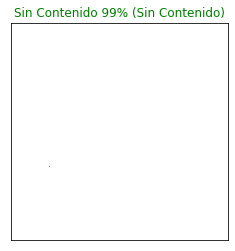

In [268]:
# Ver una predicción de ejemplo, una imagen original y una etiqueta de verdad
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [269]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
Traza las 10 mejores predicciones de confianza junto con
   la etiqueta de verdad para la muestra n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

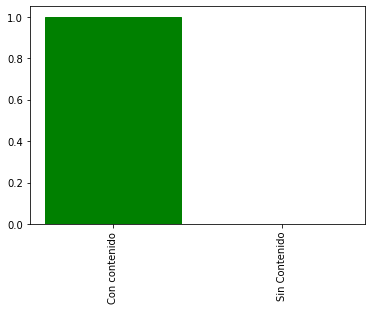

In [270]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

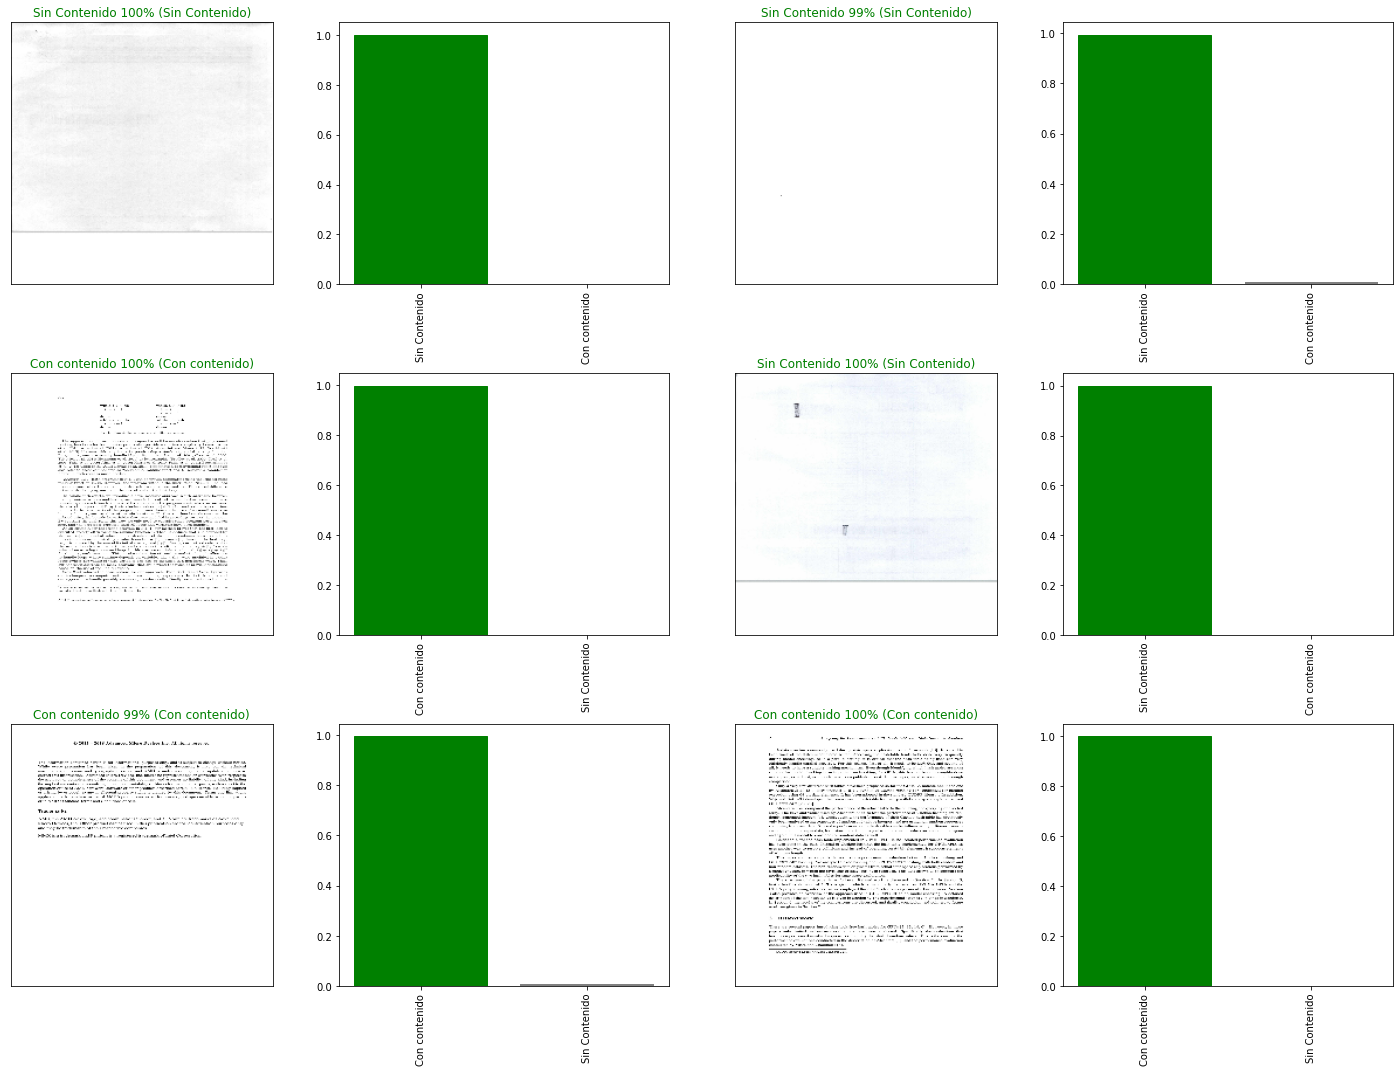

In [271]:
# Revisemos algunas predicciones y sus diferentes valores
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()